In [39]:
import networkx as nx
from model.synthetic_graph import load_fork_tree
from running import rw_directory

In [40]:
custom_style = {
    'axes.prop_cycle': plt.cycler('color', ['red', 'green', 'blue']),
    'lines.linewidth': 2,
    'font.size': 12,
    'font.family': 'times new roman',
    'axes.facecolor': 'w',
    'axes.edgecolor': 'black',
    'axes.titlesize': 20,
    'legend.fontsize': 18,
    'axes.labelsize': 20,
    'axes.linewidth':2,
    'xtick.labelsize':12,
    'ytick.labelsize':12
}
plt.style.use(custom_style)

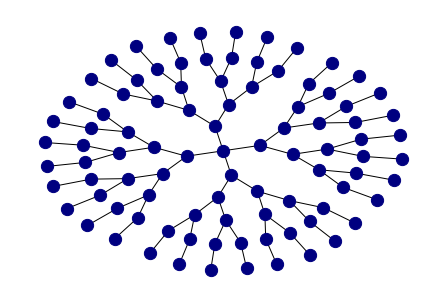

In [41]:
forks = [4, 2, 2, 2, 1]
g, _ = load_fork_tree(forks)
# 不知为何在load_fork_tree设置会失败
g.set_graph_tag(str(forks))

# 排列成好看的样子
pos = nx.layout.kamada_kawai_layout(g, scale=1)

import matplotlib.pyplot as plt

# nx.draw_networkx(g, pos=pos)
nx.draw(g, pos, with_labels=False, node_size=150, font_size=9, node_color='navy')
plt.savefig(rw_directory.result_path(2, 'forks.pdf'), bbox_inches='tight')

In [42]:
from model.AMKS.amks import MultiHopAMKS

embed_model = MultiHopAMKS()
time = 0.2
embed_model.set_time(time)
embed_model.set_g(g)
embed_model.set_maxhop(1)
embed_model.set_sigma(0.8)
embed_model.set_step(2)

In [43]:
def scale(num, target=None):
    if target is None:
        target = [0, 1]
    max_x = max(num)
    min_x = min(num)
    target_max = target[1]
    target_min = target[0]
    num = (num - min_x) / (max_x - min_x)
    num = num * (target_max - target_min) + target_min
    return num

In [44]:
import matplotlib.pyplot as plt


def show_network(time0, g, color_score, title=""):
    # cmap = plt.cm.YlOrRd
    # cmap = 'plasma'
    cmap = 'YlOrBr'
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm._A = color_score
    labels = {i: label for i, label in enumerate(color_score)}

    # g = nx.convert_node_labels_to_integers(g, ordering = 'sorted',
    #                                         label_attribute = 'origin' )

    nx.draw(g, pos=pos, node_color=color_score, cmap=cmap, with_labels=False, node_size=150, font_size=20)
    # plt.title(str(title))
    # plt.colorbar(sm)
    file_name = 'time=' + str(time0) + '.pdf'
    plt.savefig(rw_directory.result_path(2, file_name), bbox_inches='tight')
    plt.show()

[[0.00016975 0.00090972 0.00022508 0.00113207]
 [0.00018499 0.00073025 0.00022675 0.00090323]
 [0.00018499 0.00073025 0.00022675 0.00090323]
 [0.00018499 0.00073025 0.00022675 0.00090323]
 [0.00018499 0.00073025 0.00022675 0.00090323]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00018776 0.00075872 0.0002257  0.00090035]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 0.00082149 0.00022395 0.00089586]
 [0.00019299 

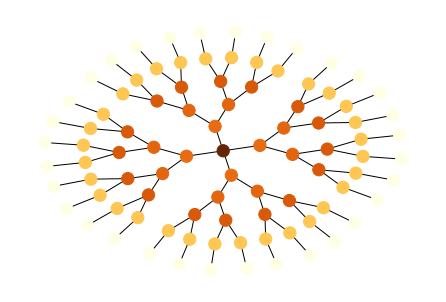

In [45]:


time = 0.2
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
print(embed_vecs_sorted)
print(embed_vecs_sorted[0])
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
print(color_score)
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 5.91224622e-01 5.91224622e-01 5.91224622e-01
 5.91224622e-01 6.34356615e-01 6.34356615e-01 6.34356615e-01
 6.34356615e-01 6.34356615e-01 6.34356615e-01 6.34356615e-01
 6.34356615e-01 7.43259350e-01 7.43259350e-01 7.43259350e-01
 7.43259350e-01 7.43259350e-01 7.43259350e-01 7.43259350e-01
 7.43259350e-01 7.43259350e-01 7.43259350e-01 7.43259350e-01
 7.43259350e-01 7.43259350e-01 7.43259350e-01 7.43259350e-01
 7.43259350e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 4.05429097e-01 4.05429097e-01 4.05429097e-01
 4.05429097e-01 1.08390123e-15 1.08390123e-15 1.39358730e-15
 9.29058198e-16 6.193721

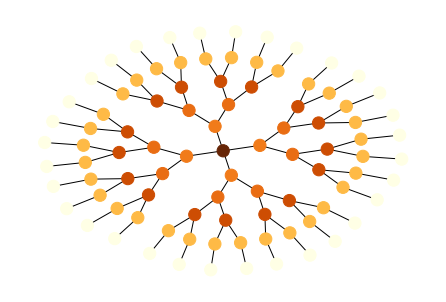

In [46]:
time = 0.5
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 4.02353229e-01 4.02353229e-01 4.02353229e-01
 4.02353229e-01 4.82105951e-01 4.82105951e-01 4.82105951e-01
 4.82105951e-01 4.82105951e-01 4.82105951e-01 4.82105951e-01
 4.82105951e-01 8.04176128e-01 8.04176128e-01 8.04176128e-01
 8.04176128e-01 8.04176128e-01 8.04176128e-01 8.04176128e-01
 8.04176128e-01 8.04176128e-01 8.04176128e-01 8.04176128e-01
 8.04176128e-01 8.04176128e-01 8.04176128e-01 8.04176128e-01
 8.04176128e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 5.38146666e-01 5.38146666e-01 5.38146666e-01
 5.38146666e-01 1.52534754e-15 2.13548655e-15 2.44055606e-15
 1.52534754e-15 9.152085

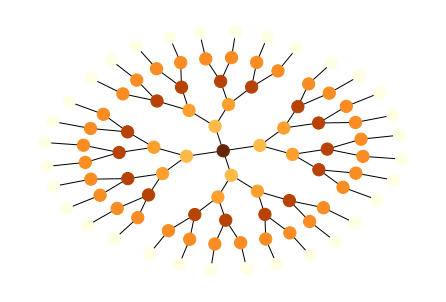

In [47]:
time = 1
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 3.68222926e-01 3.68222926e-01 3.68222926e-01
 3.68222926e-01 1.95241780e-01 1.95241780e-01 1.95241780e-01
 1.95241780e-01 1.95241780e-01 1.95241780e-01 1.95241780e-01
 1.95241780e-01 6.10101593e-01 6.10101593e-01 6.10101593e-01
 6.10101593e-01 6.10101593e-01 6.10101593e-01 6.10101593e-01
 6.10101593e-01 6.10101593e-01 6.10101593e-01 6.10101593e-01
 6.10101593e-01 6.10101593e-01 6.10101593e-01 6.10101593e-01
 6.10101593e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 3.86615283e-01 3.86615283e-01 3.86615283e-01
 3.86615283e-01 1.47199280e-15 1.89256217e-15 3.99540902e-15
 6.93939461e-15 3.154270

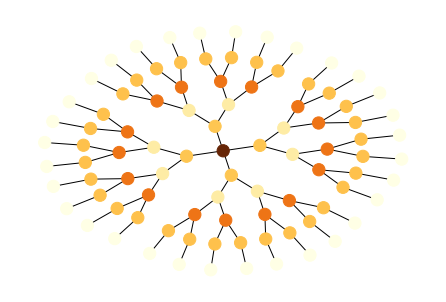

In [48]:
time = 10
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 4.90703176e-01 4.90703176e-01 4.90703176e-01
 4.90703176e-01 3.34545807e-01 3.34545807e-01 3.34545807e-01
 3.34545807e-01 3.34545807e-01 3.34545807e-01 3.34545807e-01
 3.34545807e-01 4.27546228e-01 4.27546228e-01 4.27546228e-01
 4.27546228e-01 4.27546228e-01 4.27546228e-01 4.27546228e-01
 4.27546228e-01 4.27546228e-01 4.27546228e-01 4.27546228e-01
 4.27546228e-01 4.27546228e-01 4.27546228e-01 4.27546228e-01
 4.27546228e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 2.55153900e-01 2.55153900e-01 2.55153900e-01
 2.55153900e-01 5.07006709e-15 7.88677103e-15 1.97169276e-15
 6.76008945e-15 4.506726

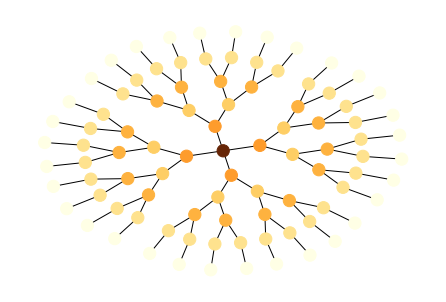

In [49]:
time = 100
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 4.87914777e-01 4.87914777e-01 4.87914777e-01
 4.87914777e-01 3.32452377e-01 3.32452377e-01 3.32452377e-01
 3.32452377e-01 3.32452377e-01 3.32452377e-01 3.32452377e-01
 3.32452377e-01 4.36385042e-01 4.36385042e-01 4.36385042e-01
 4.36385042e-01 4.36385042e-01 4.36385042e-01 4.36385042e-01
 4.36385042e-01 4.36385042e-01 4.36385042e-01 4.36385042e-01
 4.36385042e-01 4.36385042e-01 4.36385042e-01 4.36385042e-01
 4.36385042e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.62541018e-01 2.62541018e-01 2.62541018e-01
 2.62541018e-01 2.60922703e-15 5.21845406e-15 5.79828229e-16
 5.21845406e-15 2.609227

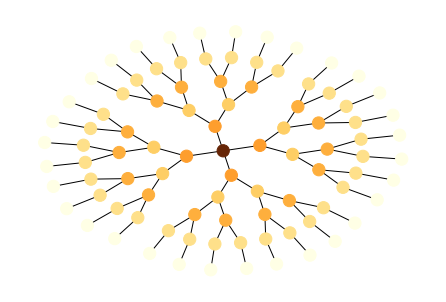

In [50]:
time = 100000
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))

[1.00000000e+00 4.87910786e-01 4.87910786e-01 4.87910786e-01
 4.87910786e-01 3.32438423e-01 3.32438423e-01 3.32438423e-01
 3.32438423e-01 3.32438423e-01 3.32438423e-01 3.32438423e-01
 3.32438423e-01 4.36373860e-01 4.36373860e-01 4.36373860e-01
 4.36373860e-01 4.36373860e-01 4.36373860e-01 4.36373860e-01
 4.36373860e-01 4.36373860e-01 4.36373860e-01 4.36373860e-01
 4.36373860e-01 4.36373860e-01 4.36373860e-01 4.36373860e-01
 4.36373860e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 2.62537182e-01 2.62537182e-01 2.62537182e-01
 2.62537182e-01 5.21852105e-15 7.82778158e-15 1.73950702e-15
 6.52315132e-15 3.044137

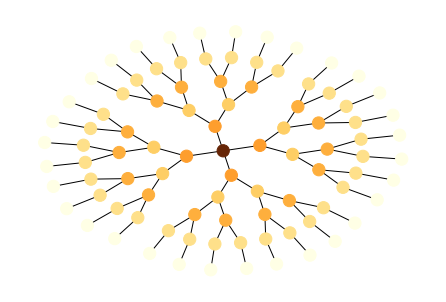

In [51]:
time = 100000000
embed_model.set_time(time)
embed_model.compute_emb_vec()
embed_vecs_sorted = embed_model.get_embedding_vec(sorted(g.nodes))
color_score = embed_vecs_sorted.dot(embed_vecs_sorted[0])
color_score = scale(color_score)
print(color_score)
show_network(time, g, color_score, "T = " + str(time))